<a href="https://colab.research.google.com/github/javadvahid/ML-course/blob/main/ML_course_project4_1_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression multiclass classification

# رگرسیون لاجستیک(کلاسفیکیشن چند کلاسه)


در این پروژه هدف تشخیص عدد موود در تصویر می باشد

:مشخصات دیتا

دیتای ورودی : تصاویر از اعداد دست نویس در ابعاد 20 در 20

دیتای خروجی : شماره موجود در تصویر (0 تا 9)

<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1LYg0QQck22uZpbCLa6aUW8brKXPjcU9W">
</p>

همانطور که در ویدئو های بخش سوم توضیح داده شد و در اسلاید هم دیده میشود

برای کلاسیفیکیشن چند کلاسه ما باید به تعداد کلاس هایی که داریم

مدل آموزش بدیم برای کلاسیفیکیشن

در مثال بررسی شده ما 3 کلاس در نظر گرفتیم

ولی در این پروژه ما 10 کلاس داریم

پس باید 10 مدل جداگانه آموزش بدیم 

بریم ابتدا داده ها رو لود کنیم

In [ ]:
#load data set from project4data1.mat file
#ذخیره شده است .mat تصاویر در یک فایل با فرمت 
#first upload project4data1.mat to colab
#ابتدا فایل مربوطه را در این محیط آپلود کرده
#load the .mat file using scipy library
#تصاویر را در یک متغیر لود می کنیم scipy با استفاده از کتابخانه 

from scipy.io import loadmat

data = loadmat('/content/drive/MyDrive/ml-projects/week4/project4data1.mat')



In [ ]:
#data is now a dictionary containing images
print(type(data))

<class 'dict'>


In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data['X']
#output
Y = data['y']

#find m
m = Y.shape[0]
print(m)

5000


In [ ]:
print(X.shape, Y.shape)

(5000, 400) (5000, 1)


In [ ]:
Y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

# Data Visualization:

# نمایش داده ها

Text(0.5, 1.0, '[2]')

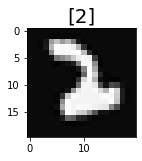

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#choose the index of image to show
#انتخاب شماره عکسی که میخواهیم نمایش دهیم
idx = 1200

#choose figure size
#انتخاب سایز نمودار
plt.figure(figsize=(2,2))

#convert shape of iamge from (400,) to (20, 20) and display it
plt.imshow(np.reshape(X[idx], (20, 20)).T, cmap='gray')
#add the label of image as the title of figure
#لیبل عکس را به عنوان تیتر بالای تصویر چاپ کنید
plt.title(str(Y[idx]), fontsize = 20)



In [ ]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of X[idx]:", X[idx].shape)
print("shape of Y:", Y.shape)


shape of X: (5000, 400)
shape of X[idx]: (400,)
shape of Y: (5000, 1)


# creating X and Y matrices with the right dimensions as shown in the slide

# دقیقا به صورتی که در اسلاید زیر نمایش داده شده است X,Y ایجاد ماتریس

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [ ]:
#Convert dimension X from (m, n) to (n, m)
X = np.transpose(X)
X.shape

(400, 5000)

In [ ]:
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 5000)

In [ ]:
#add x0=1 to all the data 
#به همه داده ها x0=1 اضافه کردن 
X = np.concatenate([np.ones((1, m)), X], axis=0)
X.shape

(401, 5000)

# **Cost Function With Regularization: implementation **

# پیاده سازی تابع هزینه 





---
# First method: simple implementation using for loop as shown in the slide below

روش اول: پیاده سازی ساده با استفاده از حلقه به صورت نشان داده شده در اسلاید زیر


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1dTN9GmNaKcM5ZIScH2P_vVLjG77t5sjg">
</p>



---
# Second method: vectorized implementation 

# روش دوم: پیاده سازی به صورت برداری


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1ytdvFMQoWl1dsG88eeERv5d0UxMre4AN">
</p>




In [ ]:
#create a function for sigmoid g = 1/(1 + e^-x)
#ابتدا تابع سیگموید را پیاده سازی کنید
def sigmoid(x):
  g = 1/(1+np.exp(-x))
  return g
  

In [ ]:
#create a function for computing cost J
#تابعی بنویسید که تابع هزینه را محاسبه کند به صورت برداری
def computeCostWithReg(X, Y, thetatemp, lambda_):
  #find m
  m = X.shape[1]

  # compute h using sigmoid function and thetatemp and X
  h = sigmoid(np.matmul(np.transpose(thetatemp), X))

  #use h and compute cost
  #use np.log() for logarithm
  #use np.transpose() for transpose 
  #np.matmul() for matrix multiplication
  cost = (-1/m)*(np.matmul(np.log(h), np.transpose(Y)) + np.matmul(np.log(1 - h), np.transpose(1-Y)))
  costWithReg = cost + (lambda_/(2*m)) * np.matmul(np.transpose(thetatemp[1:]), thetatemp[1:])

  return costWithReg


In [ ]:
#initialize theta to [[0], [0], [0]]
#انتخاب تتای اولیه به صورت گفته شده 
theta = np.zeros((X.shape[0], 1))

#use the function you created to compute cost for initialized theta
cost = computeCostWithReg(X, Y, theta, lambda_=1)
print("initial cost is:", cost)

initial cost is: [[142.64968976]]


پاسخ صحیح در صورت پیاده سازی درست  [[142.6496]]

# **Gradient Descent WithReg: implementation**

# پیاده سازی کاهش گرادیان 





---
# First method: simple implementation using for loop as shown in the slide below

# روش اول: پیاده سازی ساده با استفاده از حلقه به صورت نشان داده شده در اسلاید زیر


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1906OIZGT-MUITqOD34_93Y7eg1ZHutjP">
</p>



---
# Second method: vectorized implementation 

# روش دوم: پیاده سازی به صورت برداری


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1v7z__YImgydKcngc4hnFdEsEbKBUO1L6">
</p>




In [ ]:
#create a function for gradient descent with regularization
#
def gradientDescentWithReg(X, Y, thetatemp, lr, epochs, lambda_):
  m = X.shape[1]
  J_history = []
  for epoch in range(epochs):
    thetatempreg = thetatemp.copy()
    thetatempreg[0] = 0
    h = sigmoid(np.matmul(np.transpose(thetatemp), X))
    temp = np.transpose(h - Y)
    thetatemp = thetatemp - (lr/m) * (np.matmul(X, temp) + (lambda_)*thetatempreg)
    
    J_history.append(computeCostWithReg(X, Y, thetatemp, lambda_)[0, 0])

  return thetatemp, J_history

In [ ]:
#initialize theta and train logistic regression
#انتخاب مقادیر اولیه 0 برای تتا
theta = np.zeros((X.shape[0], 1))

#set epochs and learning rate
#مقدار دهی برای نرخ یادگیری، تعداد تکرار
epochs = 200
lr = 0.0001
#run gradientDescent and print theta and last cost

thetanew, J_history = gradientDescentWithReg(X, Y, theta, lr, epochs, .1)
#print theta
#print(thetanew)

#print last cost >>> J_history[-1]
print("last cost: ", J_history[-1])




last cost:  346.3194096668563



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1NtDl_Ru3Ko1FiBlyEYNZ8NjlM_nfpabT">
</p>

In [ ]:
#create a function to do one_vs_all classification for K classes
#دسته انجام دهد K را برای  one_vs_all  تابعی بنویسید که با کلاسیفیکیشن مدل 

def one_vs_all(X, Y, num_classes, lr, num_epochs, lambda_,):
  #find m and n (number of features)
  n, m = X.shape
  #n=401, m=5000, 
  alltheta = np.zeros((n, num_classes))
  for i in range(num_classes):
    #converting all classes to 2 classes
    #set all classes to zero
    Y_temp = np.zeros(Y.shape)
    #set the deired class i labels to 1
    Y_temp[ Y == i] = 1
    
    initial_theta = np.zeros((X.shape[0], 1))
    final_theta, J_hsitory = gradientDescentWithReg(X, Y_temp, initial_theta, lr, num_epochs, lambda_)
    
    alltheta[:, i] = final_theta[:,0]

  return alltheta  


In [ ]:
alltheta = one_vs_all(X, Y, 10, lr=0.01, num_epochs=50, lambda_=0.1)

In [ ]:
print(alltheta.shape)

(401, 10)


In [ ]:
def predict_one_vs_all(alltheta, test_image):
  all_preds=[]

  for i in range(alltheta.shape[1]):

    pred = sigmoid(np.matmul(alltheta[:, i].T, test_image))
    all_preds.append(pred)
  return all_preds

In [ ]:
#predict the output of all models for and input, for example X[:, 2000], check different images on you won
all_preds = predict_one_vs_all(alltheta, X[:, 700])
#now there are 10 probablities predicted in all_preds
#let's print all_preds
print(all_preds)

[0.3190743441029543, 0.3531980335575119, 0.33476623736768063, 0.3450483607783183, 0.3302896142595657, 0.3395618293190972, 0.34130728212013955, 0.33997115893346097, 0.3513396129088537, 0.3402672572281772]


In [ ]:
#now the maximum of these 10 values is our answer
#we can use np.argmax to get the max probablity
digit = np.argmax(all_preds)
print(digit)

1


Text(0.5, 1.0, '1')

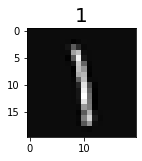

In [ ]:
#now lets show the test image and see if our model is working well
import numpy as np 
import matplotlib.pyplot as plt

#choose the index of image to show
#انتخاب شماره عکسی که میخواهیم نمایش دهیم
idx = 700

#choose figure size
#انتخاب سایز نمودار
plt.figure(figsize=(2,2))

#convert shape of iamge from (400,) to (20, 20) and display it
plt.imshow(np.reshape(X[1:, idx], (20, 20)).T, cmap='gray')
#add the label of image as the title of figure
#لیبل عکس را به عنوان تیتر بالای تصویر چاپ کنید
plt.title(str(Y[0,idx]), fontsize = 20)



In [ ]:
# exercise1: implement multiclass classification using sklearn 
# one vs all/ one vs rest